In [77]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

In [78]:
q = [0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995]

In [79]:
def statistical_analysis (r, q ):
    if (type(r) is not list) & (type(r) is not tuple):
        print('Нужен список или кортеж')
        return
    
    if len(r)<4:
        print('Нужно больше наблюдений')
        return
    
    r=pd.Series(r)
    
    m = r.mean()
    v=r.var()
    s = r.std()
    
    print ('Среднее значение  ряда равно',m)
    print ('Дисперсия ряда равна',v)
    print ('Стандартное отклонение ряда составляет',s)
    print()
    
    qs = np.quantile(r,q)
    
    for i in range(len(q)):
        if q[i]==0.5:
            print("Mediane=",qs[i])
        elif q[i]==0.25:
            print("First quantile =", qs[i])
        elif q[i]==0.75:
            print("Third quantile =", qs[i])
        elif q[i]*100 % 10==0:
            print("Decile number", q[i]*10,"=",qs[i])
        else:
            print('Quantile',q[i],'=',qs[i])
    
    sns.histplot(data=r)
    
    return  m, v, s, qs
        

In [80]:
def test_calc(r1,r2,alpha=0.05):
    s,p =ttest_ind(r1,r2)
    
    if p< alpha:
        print("Гипотеза Н0 не подверждена:средние равны")
        print ("Разница средних = ",r1.mean()-r2.mean())
    else:
        print("Гипотеза Н0 подтверждается:средние равны")
        print("Разница средних = 0")
    return s,p

In [81]:
def mann_whitney_func( r1, r2, alpha =.05):
    
    s,p =mannwhitneyu (r1, r2)   
    
    if p < alpha:
        print("Распределения не равны")
    else:
        print("Распределения равны")
    return s, p
        


In [82]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep = ';')
df.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [83]:
df.describe()

,id_client,sum_pay,id_point,months_reg
count,1.097600e+04,10849.000000,10895.000000,10976.000000
mean,1.373018e+06,3568.751037,1180.040385,4.717566
std,1.477359e+04,2927.164583,4.345107,3.185566
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361744e+06,1251.000000,1178.000000,2.000000
50%,1.370690e+06,3173.000000,1179.000000,4.000000
75%,1.373433e+06,5358.000000,1179.000000,7.000000
max,1.420345e+06,24797.000000,1199.000000,14.000000


In [84]:
df.groupby('id_group').count()

,id_client,sum_pay,id_point,months_reg
id_group,,,,
control,5202,5175,5198,5202
test,5700,5673,5696,5700


In [85]:
len(df[df['id_group'].isnull()])

74

In [86]:
len(df[df['sum_pay'].isnull()])

127

In [87]:
len(df[df['id_point'].isnull()])

81

In [88]:
df = df[(~df['id_group'].isnull()) & (~df['sum_pay'].isnull()) & (~df['id_point'].isnull())]
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


Среднее значение  ряда равно 3568.7580258302582
Дисперсия ряда равна 8568932.941996625
Стандартное отклонение ряда составляет 2927.27397795229

Decile number 1.0 = 410.0
First quantile = 1250.75
Decile number 3.0 = 1590.0
Decile number 4.0 = 2329.6000000000004
Mediane= 3173.5
Decile number 6.0 = 3934.0
Third quantile = 5356.5
Decile number 9.0 = 7088.200000000001
Quantile 0.91 = 7203.0
Quantile 0.92 = 7333.880000000001
Quantile 0.93 = 7460.27
Quantile 0.94 = 7635.66
Quantile 0.95 = 7805.0999999999985
Quantile 0.96 = 8041.0
Quantile 0.97 = 8453.64
Quantile 0.98 = 9043.659999999998
Quantile 0.99 = 9809.76000000001
Quantile 0.995 = 21046.075000000004


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([  410.   ,  1250.75 ,  1590.   ,  2329.6  ,  3173.5  ,  3934.   ,
         5356.5  ,  7088.2  ,  7203.   ,  7333.88 ,  7460.27 ,  7635.66 ,
         7805.1  ,  8041.   ,  8453.64 ,  9043.66 ,  9809.76 , 21046.075]))

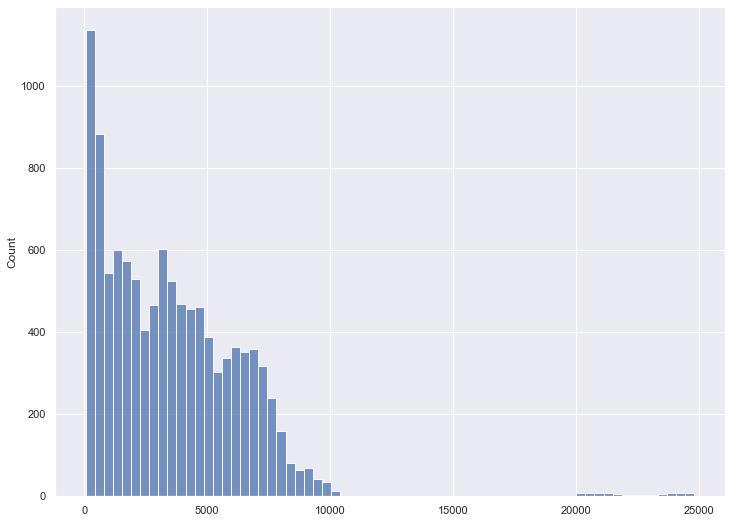

In [89]:
statistical_analysis(tuple(df['sum_pay']), q)

In [90]:
df =df[df['sum_pay']<20000]


In [91]:
df_pr=df.groupby(['id_point','id_group']).agg({'id_client':'count','sum_pay':'mean'})
df_pr

id_client      sum_pay
id_point id_group                        
1178.0   control        2403  3036.214732
         test           2406  2936.386949
1179.0   control        1697  3331.310548
         test           1745  3421.826934
1182.0   control        1012  4036.942688
         test            950  4945.129474
1186.0   control          23  4546.000000
         test             40  3638.400000
1188.0   control           5  5202.000000
         test              4  4946.000000
1199.0   test            476  3908.861345

In [92]:
df = df[~df['id_point'].isin([1182.0,1186.0,1188.0,1199.0])]
df

,id_client,id_group,sum_pay,id_point,months_reg
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
5,1371160,test,218.0,1179.0,5
6,1372110,test,1295.0,1179.0,1
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [93]:
df_pr_1=df.groupby(['id_point','id_group']).agg({'id_point':'count','sum_pay':'mean'})
df_pr_1

id_point      sum_pay
id_point id_group                       
1178.0   control       2403  3036.214732
         test          2406  2936.386949
1179.0   control       1697  3331.310548
         test          1745  3421.826934

In [94]:
df_A = df[df['id_group'] =='control']
df_B = df[df['id_group'] == 'test']
df_B

,id_client,id_group,sum_pay,id_point,months_reg
3,1370042,test,7211.0,1179.0,3
5,1371160,test,218.0,1179.0,5
6,1372110,test,1295.0,1179.0,1
8,1372555,test,4708.0,1179.0,9
12,1360176,test,701.0,1178.0,1
...,...,...,...,...,...
10967,1359429,test,3371.0,1178.0,3
10968,1359869,test,6590.0,1178.0,5
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [95]:
def show_hist(r1,r2,graf_title, xlabel ='Размер платежа',ylabel ='Количество платящих'):
    sns.set(rc={'figure.figsize':(12,9)})
    ax1 = sns.histplot(r1,color = 'red')
    ax2 =sns.histplot(r2,color = 'green')
    ax1.set(xlabel = xlabel,ylabel = ylabel)
    plt.title(graf_title)
    plt.show()

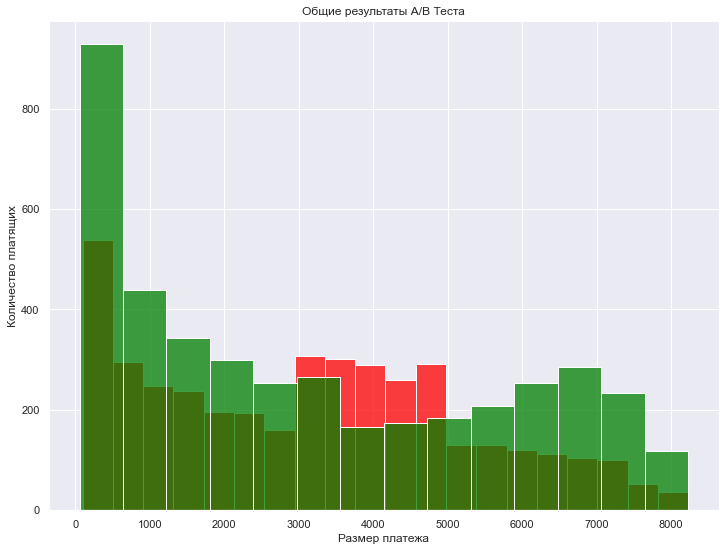

In [96]:
show_hist(df_A['sum_pay'],df_B['sum_pay'],'Общие результаты А/В Теста')

In [97]:
mann_whitney_func(df_A['sum_pay'],df_B['sum_pay'])

Распределения не равны


(8796165.0, 0.008064448959216566)

In [98]:
test_calc(df_A['sum_pay'],df_B['sum_pay'])

Гипотеза Н0 подтверждается:средние равны
Разница средних = 0


(0.35179893746829694, 0.7249980414572215)

Анализ точки 1178.0


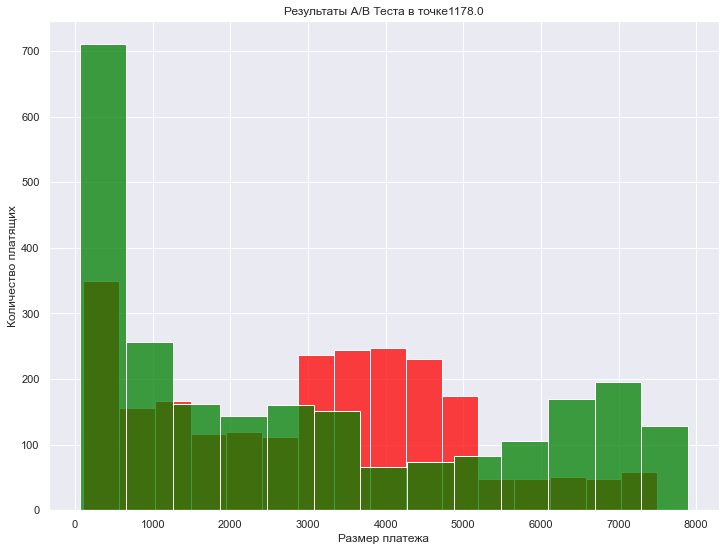

Гипотеза Н0 подтверждается:средние равны
Разница средних = 0

Распределения не равны

Анализ точки 1179.0


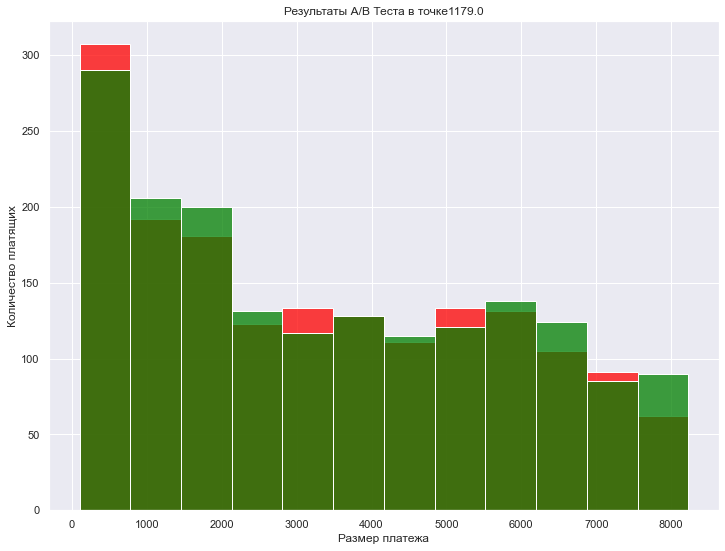

Гипотеза Н0 подтверждается:средние равны
Разница средних = 0

Распределения равны



In [99]:
for i in df.id_point.unique():
    print ('Анализ точки',i)
    df_loc_A = df_A[df_A['id_point']==i]
    df_loc_B = df_B[df_B['id_point']==i]
    
    title_loc = 'Результаты А/В Теста в точке'+ str(i)
    
    show_hist(df_loc_A['sum_pay'],df_loc_B['sum_pay'],title_loc)
    
    test_calc(df_loc_A['sum_pay'],df_loc_B['sum_pay'])
    print()
    
    mann_whitney_func(df_loc_A['sum_pay'],df_loc_B['sum_pay'])
    print()
    
    
    
    

In [100]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

C:\Phiton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Корреляция размера платежа и длительности регистрации клиента')

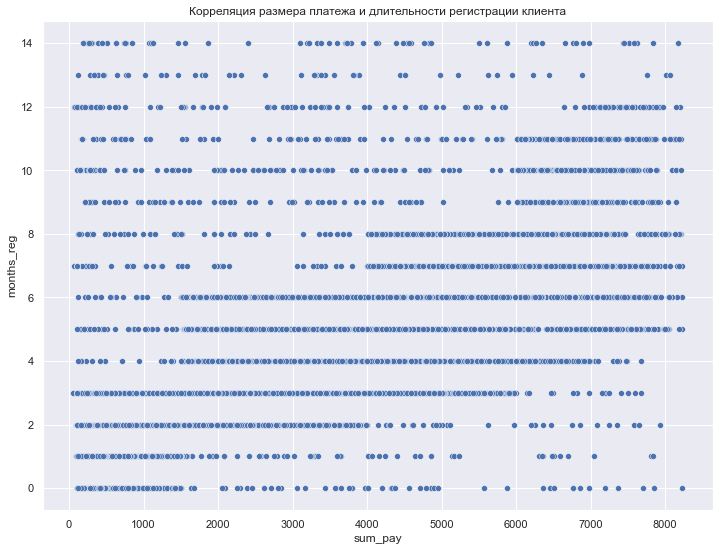

In [101]:
sns.scatterplot(df['sum_pay'],df['months_reg']).set_title("Корреляция размера платежа и длительности регистрации клиента")

In [102]:
print('Pearson',pearsonr(df['sum_pay'],df['months_reg']))
print ('Spearman',spearmanr(df['sum_pay'],df['months_reg']))

Pearson (0.5965398353117899, 0.0)
Spearman SpearmanrResult(correlation=0.6500786938230178, pvalue=0.0)


<AxesSubplot:xlabel='months_reg'>

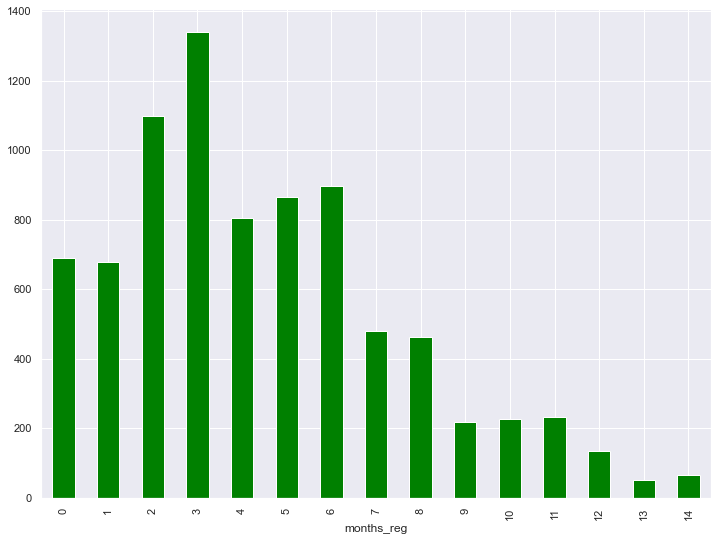

In [103]:
df.groupby('months_reg')['id_client'].count().plot(kind ='bar',color = 'green')

In [104]:
df = df[~df['id_point'].isin([1186.0,1188.0,1199.0])]
df

,id_client,id_group,sum_pay,id_point,months_reg
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
5,1371160,test,218.0,1179.0,5
6,1372110,test,1295.0,1179.0,1
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [105]:
df_2_point = df[df['months_reg'].isin([3,6,9,12,13])]
df_2_point

,id_client,id_group,sum_pay,id_point,months_reg
3,1370042,test,7211.0,1179.0,3
8,1372555,test,4708.0,1179.0,9
11,1373217,control,297.0,1179.0,9
16,1373123,control,4024.0,1179.0,12
17,1372215,control,5878.0,1179.0,6
...,...,...,...,...,...
10948,1372160,test,4590.0,1179.0,6
10955,1371136,test,5223.0,1179.0,3
10967,1359429,test,3371.0,1178.0,3
10971,1359021,control,799.0,1178.0,3


In [106]:
df_2_point_slip = df_2_point[['id_point','months_reg','sum_pay','id_group']]
df_2_point_slip

,id_point,months_reg,sum_pay,id_group
3,1179.0,3,7211.0,test
8,1179.0,9,4708.0,test
11,1179.0,9,297.0,control
16,1179.0,12,4024.0,control
17,1179.0,6,5878.0,control
...,...,...,...,...
10948,1179.0,6,4590.0,test
10955,1179.0,3,5223.0,test
10967,1178.0,3,3371.0,test
10971,1178.0,3,799.0,control


In [107]:
df_finish = df_2_point_slip

df_finish

,id_point,months_reg,sum_pay,id_group
3,1179.0,3,7211.0,test
8,1179.0,9,4708.0,test
11,1179.0,9,297.0,control
16,1179.0,12,4024.0,control
17,1179.0,6,5878.0,control
...,...,...,...,...
10948,1179.0,6,4590.0,test
10955,1179.0,3,5223.0,test
10967,1178.0,3,3371.0,test
10971,1178.0,3,799.0,control


In [108]:
df_finish_A = df_finish[df_finish['id_group'] =='control']
df_finish_B = df_finish[df_finish['id_group'] == 'test']


In [109]:
df_finish_A = df_finish_A[['id_point','months_reg','sum_pay']]
df_finish_B = df_finish_B[['id_point','months_reg','sum_pay']]


In [110]:
def show_hist(r1,r2,graf_title, xlabel ='Длительность регистрации',ylabel ='Количество платящих'):
    sns.set(rc={'figure.figsize':(12,9)})
    ax1 = sns.histplot(r1,color = 'red')
    ax2 =sns.histplot(r2,color = 'green')
    ax1.set(xlabel = xlabel,ylabel = ylabel)
    plt.title(graf_title)
    plt.show()

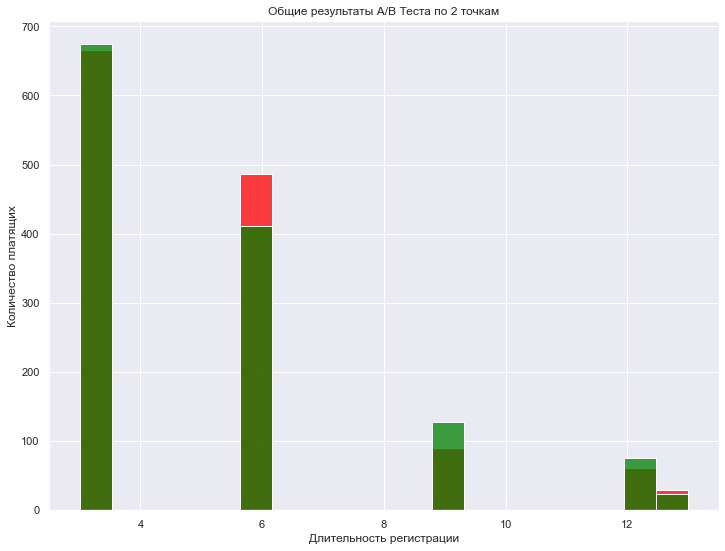

In [111]:
show_hist(df_finish_A['months_reg'],df_finish_B['months_reg'],'Общие результаты А/В Теста по 2 точкам')

Анализ точки 1179.0


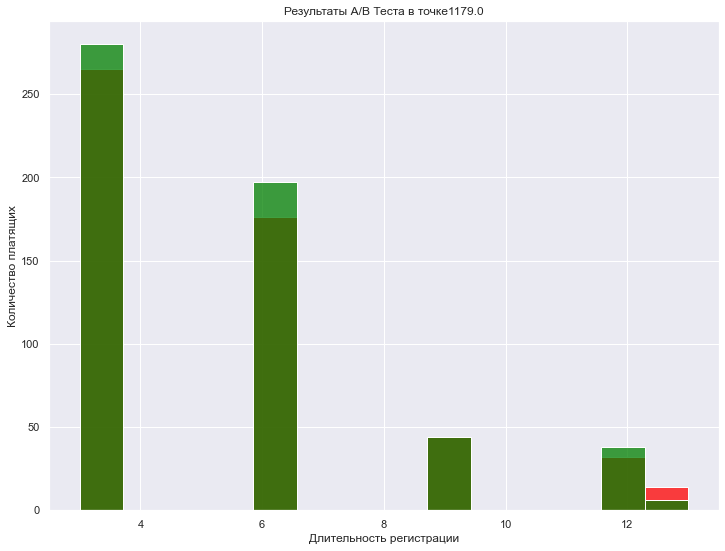

Анализ точки 1178.0


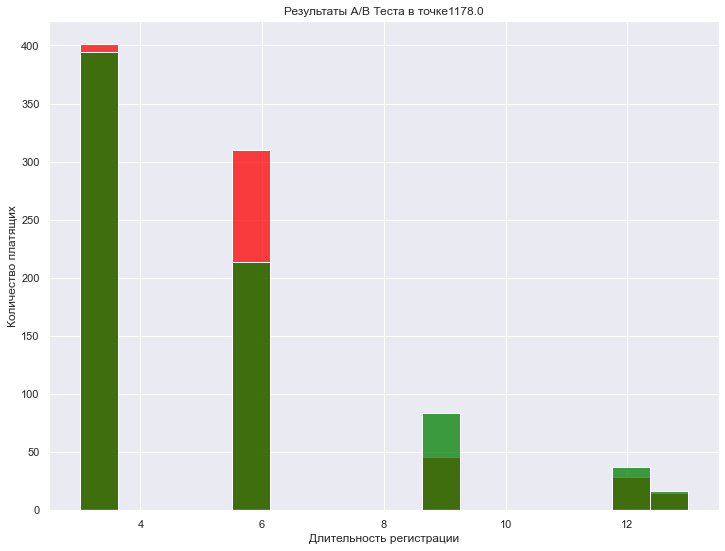

In [112]:
for i in df_finish.id_point.unique():
    print ('Анализ точки',i)
    df_loc_A = df_finish_A[df_finish_A['id_point']==i]
    df_loc_B = df_finish_B[df_finish_B['id_point']==i]
    
    title_loc = 'Результаты А/В Теста в точке'+ str(i)
    
    show_hist(df_loc_A['months_reg'],df_loc_B['months_reg'],title_loc)
    
    
    

In [113]:
df_finish = df_finish.groupby(['months_reg','id_point','id_group'])['sum_pay'].mean().reset_index()


In [114]:
df_finish_control = df_finish[df_finish['id_group'] =='control']
df_finish_test = df_finish[df_finish['id_group'] == 'test']

Анализ точки 1178.0


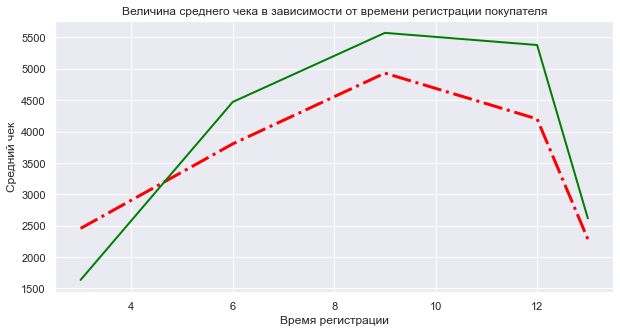

Анализ точки 1179.0


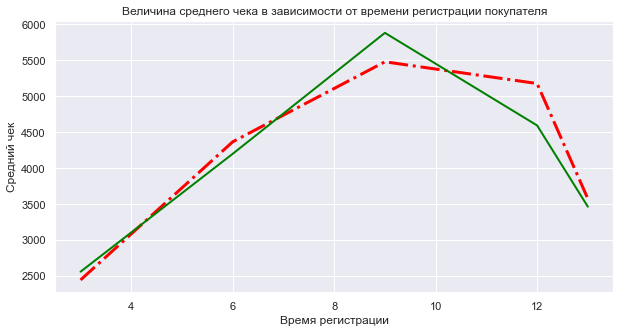

In [116]:
for i in df_finish.id_point.unique():
    print ('Анализ точки',i)
    df_loc_A = df_finish_control[df_finish_control['id_point']==i]
    df_loc_B = df_finish_test[df_finish_test['id_point']==i]
   

    plt.figure(figsize=(10, 5))  
    plt.title('Величина среднего чека в зависимости от времени регистрации покупателя') 
    plt.xlabel('Время регистрации') 
    plt.ylabel('Средний чек') 



    plt.plot(df_loc_A['months_reg'],
             df_loc_A['sum_pay'],
             color='red',
             linestyle = '-.',
             linewidth=3) 


    plt.plot(df_loc_B['months_reg'],
             df_loc_B ['sum_pay'],
             color='green',             
             linewidth=2
            )


    plt.show()
